Questions to ask: 
1. What are the common (top 5) crime categories in the cities of investigation: Cerritos, Torrance, and Pasadena? 
2. What are the change in count of crimes?
3. what is the correlation between home prices and time series? 
4. plot the crime frequency over time? Is there a correlation; possibly split it by year and instead of compiling it into one 


In [1]:
%matplotlib notebook

In [2]:
#dependencies
import csv 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import numpy as np
import seaborn as sns



In [3]:
#read csv file and convert to dataframe
home_prices_df = pd.read_csv('Resources/City_Zhvi_SingleFamilyResidence.csv')

#filter original dataframe to contain records for only cities in Los Angeles county
home_prices_df = home_prices_df.loc[home_prices_df.CountyName == "Los Angeles"]

#delete data columns not needed for data analysis 
del home_prices_df['RegionID']
del home_prices_df['Metro']
del home_prices_df['SizeRank']



In [4]:
home_prices_df = home_prices_df.reset_index(drop=True)
home_prices_df = home_prices_df.rename(columns={'RegionName':'CITY'})
home_prices_df.sort_values(by='2018-05')

plt.plot()

<IPython.core.display.Javascript object>

[]

In [5]:
#delete columns not needed for analysis
del home_prices_df['State']
del home_prices_df['CountyName']



In [6]:
indexed_home_prices = home_prices_df.set_index('CITY')
filtered_home_prices_df = indexed_home_prices.loc[:,'2017-01':'2017-12']
#filtered_home_prices_df

#---------------------------------------------

#goal is to take the time series of medians of home prices

sample_df = indexed_home_prices.T.reset_index()
sample_df

CITY,index,Los Angeles,Long Beach,Glendale,Lancaster,Palmdale,Santa Clarita,Pomona,Pasadena,Torrance,...,Acton,Avalon,Pearblossom,Rolling Hills Estates,Rolling Hills,Hidden Hills,Palos Verdes Peninsula,Lake Hughes,East Pasadena,Green Valley
0,1996-04,166400.0,163600.0,243700.0,102300.0,107100.0,198100.0,116100.0,223300.0,238300.0,...,225500.0,276800.0,NaN,517000.0,1033500.0,852400.0,523200.0,116400.0,233500.0,109100.0
1,1996-05,165900.0,163300.0,243400.0,101600.0,106900.0,197400.0,116000.0,223000.0,238400.0,...,225200.0,275600.0,NaN,517000.0,1038800.0,855400.0,522700.0,116400.0,234700.0,108800.0
2,1996-06,165500.0,162900.0,243100.0,100800.0,106600.0,196600.0,115800.0,222700.0,238600.0,...,225000.0,274300.0,NaN,517100.0,1043700.0,858200.0,522000.0,116300.0,236000.0,108400.0
3,1996-07,164900.0,162600.0,242600.0,100000.0,106300.0,195800.0,115700.0,222300.0,239100.0,...,224700.0,272900.0,NaN,517200.0,1048000.0,860900.0,521400.0,116200.0,237100.0,108000.0
4,1996-08,164500.0,162300.0,242300.0,99200.0,106000.0,195000.0,115500.0,222000.0,239600.0,...,224400.0,271600.0,NaN,517400.0,1051800.0,863700.0,521000.0,116100.0,238300.0,107600.0
5,1996-09,164100.0,162000.0,242100.0,98400.0,105700.0,194300.0,115300.0,221800.0,240300.0,...,224300.0,270600.0,NaN,517900.0,1055300.0,866600.0,521100.0,116100.0,239500.0,107400.0
6,1996-10,163800.0,162000.0,242100.0,97700.0,105600.0,193800.0,115200.0,221800.0,241100.0,...,224300.0,270100.0,NaN,518800.0,1058500.0,870000.0,521800.0,116200.0,240700.0,107200.0
7,1996-11,163800.0,162100.0,242400.0,97000.0,105500.0,193600.0,115200.0,222000.0,242000.0,...,224300.0,269800.0,NaN,520200.0,1061500.0,873700.0,523000.0,116300.0,241900.0,107100.0
8,1996-12,164000.0,162400.0,243200.0,96600.0,105500.0,193900.0,115300.0,222700.0,243100.0,...,224500.0,270000.0,NaN,522400.0,1065300.0,878700.0,525100.0,116600.0,243400.0,107000.0
9,1997-01,164500.0,162900.0,244300.0,96300.0,105700.0,194300.0,115500.0,223700.0,244200.0,...,225000.0,270600.0,NaN,525200.0,1069000.0,884400.0,527800.0,117000.0,245200.0,107000.0


In [7]:
sample_df['index'] =  pd.to_datetime(sample_df['index'], format='%Y-%m')
sample_df = sample_df.rename(columns={'index':'Date'})
sample_df

CITY,Date,Los Angeles,Long Beach,Glendale,Lancaster,Palmdale,Santa Clarita,Pomona,Pasadena,Torrance,...,Acton,Avalon,Pearblossom,Rolling Hills Estates,Rolling Hills,Hidden Hills,Palos Verdes Peninsula,Lake Hughes,East Pasadena,Green Valley
0,1996-04-01,166400.0,163600.0,243700.0,102300.0,107100.0,198100.0,116100.0,223300.0,238300.0,...,225500.0,276800.0,NaN,517000.0,1033500.0,852400.0,523200.0,116400.0,233500.0,109100.0
1,1996-05-01,165900.0,163300.0,243400.0,101600.0,106900.0,197400.0,116000.0,223000.0,238400.0,...,225200.0,275600.0,NaN,517000.0,1038800.0,855400.0,522700.0,116400.0,234700.0,108800.0
2,1996-06-01,165500.0,162900.0,243100.0,100800.0,106600.0,196600.0,115800.0,222700.0,238600.0,...,225000.0,274300.0,NaN,517100.0,1043700.0,858200.0,522000.0,116300.0,236000.0,108400.0
3,1996-07-01,164900.0,162600.0,242600.0,100000.0,106300.0,195800.0,115700.0,222300.0,239100.0,...,224700.0,272900.0,NaN,517200.0,1048000.0,860900.0,521400.0,116200.0,237100.0,108000.0
4,1996-08-01,164500.0,162300.0,242300.0,99200.0,106000.0,195000.0,115500.0,222000.0,239600.0,...,224400.0,271600.0,NaN,517400.0,1051800.0,863700.0,521000.0,116100.0,238300.0,107600.0
5,1996-09-01,164100.0,162000.0,242100.0,98400.0,105700.0,194300.0,115300.0,221800.0,240300.0,...,224300.0,270600.0,NaN,517900.0,1055300.0,866600.0,521100.0,116100.0,239500.0,107400.0
6,1996-10-01,163800.0,162000.0,242100.0,97700.0,105600.0,193800.0,115200.0,221800.0,241100.0,...,224300.0,270100.0,NaN,518800.0,1058500.0,870000.0,521800.0,116200.0,240700.0,107200.0
7,1996-11-01,163800.0,162100.0,242400.0,97000.0,105500.0,193600.0,115200.0,222000.0,242000.0,...,224300.0,269800.0,NaN,520200.0,1061500.0,873700.0,523000.0,116300.0,241900.0,107100.0
8,1996-12-01,164000.0,162400.0,243200.0,96600.0,105500.0,193900.0,115300.0,222700.0,243100.0,...,224500.0,270000.0,NaN,522400.0,1065300.0,878700.0,525100.0,116600.0,243400.0,107000.0
9,1997-01-01,164500.0,162900.0,244300.0,96300.0,105700.0,194300.0,115500.0,223700.0,244200.0,...,225000.0,270600.0,NaN,525200.0,1069000.0,884400.0,527800.0,117000.0,245200.0,107000.0


In [8]:
#plot time series of change in home prices (Torrance, Pasadena, Cerritos)
plt.figure(figsize=(10,8))
plt.xlabel("Time", fontsize=15)
plt.ylabel("Home Value ($)", fontsize=15)

plt.plot(sample_df['Date'], sample_df['Torrance'])
plt.plot(sample_df['Date'], sample_df['Pasadena'])
plt.plot(sample_df['Date'], sample_df['Cerritos'])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


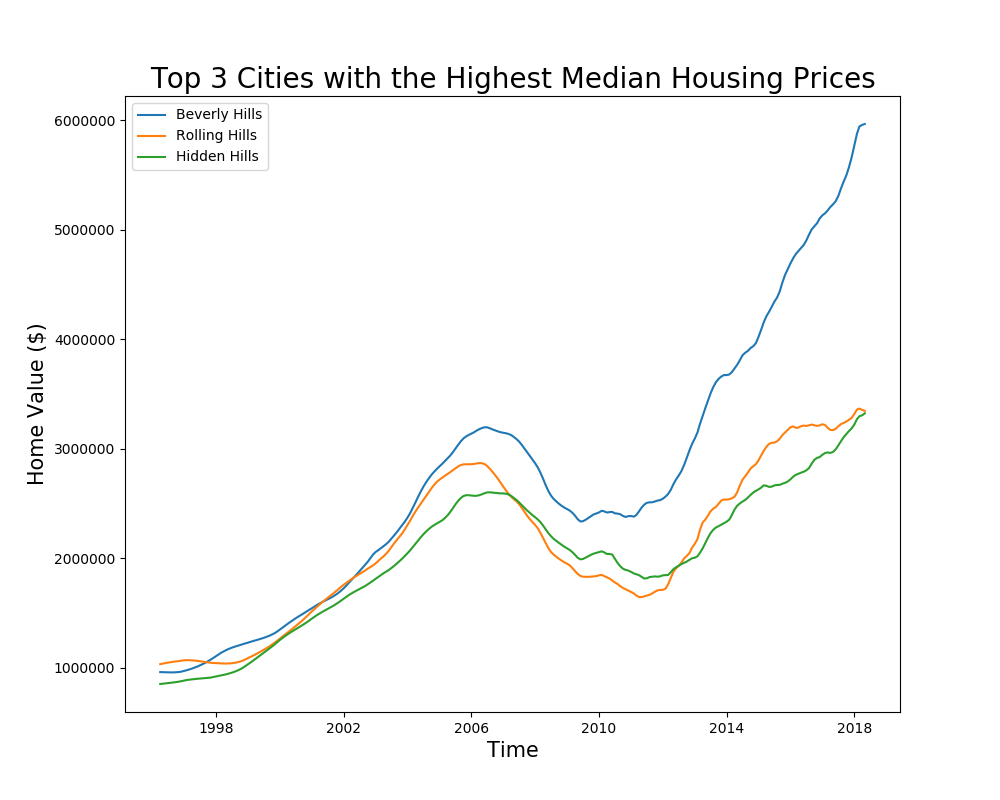

In [15]:
#plot time series of change in home prices
plt.figure(figsize=(10,8))
plt.xlabel("Time", fontsize=15)
plt.ylabel("Home Value ($)", fontsize=15)

plt.plot(sample_df['Date'], sample_df['Beverly Hills'])
plt.plot(sample_df['Date'], sample_df['Rolling Hills'])
plt.plot(sample_df['Date'], sample_df['Hidden Hills'])

plt.title('Top 3 Cities with the Highest Median Housing Prices', fontsize=20)
plt.legend()
plt.show()

plt.savefig('top3_prices.png')


In [16]:
#create pandas dataframe for historical crime data (2017) from csv file
crime_data_df_2017 = pd.read_csv("RawData/2017-PART_I_AND_II_CRIMES.csv")
crime_data_df_2017.head()

#create pandas dataframe for historical crime data (2016) from csv file
crime_data_df_2016 = pd.read_csv("RawData/2016-PART_I_AND_II_CRIMES.csv")
crime_data_df_2016.head()

#create pandas dataframe for historical crime data (2015) from csv file
crime_data_df_2015 = pd.read_csv("RawData/2015-PART_I_AND_II_CRIMES.csv")
crime_data_df_2015.head()

#create pandas dataframe for historical crime data (2014) from csv file
crime_data_df_2014 = pd.read_csv("RawData/2014-PART_I_AND_II_CRIMES.csv")
crime_data_df_2014.head()

#create pandas dataframe for historical crime data (2013) from csv file
crime_data_df_2013 = pd.read_csv("RawData/2013-PART_I_AND_II_CRIMES.csv")
crime_data_df_2013.head()

#create pandas dataframe for historical crime data (2012) from csv file
crime_data_df_2012 = pd.read_csv("RawData/2012-PART_I_AND_II_CRIMES.csv")
crime_data_df_2012.head()

#create pandas dataframe for historical crime data (2011) from csv file
crime_data_df_2011 = pd.read_csv("RawData/2011-PART_I_AND_II_CRIMES.csv")
crime_data_df_2011.head()

#create pandas dataframe for historical crime data (2010) from csv file
crime_data_df_2010 = pd.read_csv("RawData/2010-PART_I_AND_II_CRIMES.csv")
crime_data_df_2010.head()

#create pandas dataframe for historical crime data (2009) from csv file
crime_data_df_2009 = pd.read_csv("RawData/2009-PART_I_AND_II_CRIMES.csv")
crime_data_df_2009.head()

#create pandas dataframe for historical crime data (2008) from csv file
crime_data_df_2008 = pd.read_csv("RawData/2008-PART_I_AND_II_CRIMES.csv")
crime_data_df_2008.head()

#create pandas dataframe for historical crime data (2007) from csv file
crime_data_df_2007 = pd.read_csv("RawData/2007-PART_I_AND_II_CRIMES.csv")
crime_data_df_2007.head()

#create pandas dataframe for historical crime data (2006) from csv file
crime_data_df_2006 = pd.read_csv("RawData/2006-PART_I_AND_II_CRIMES.csv")
crime_data_df_2006.head()

#create pandas dataframe for historical crime data (2005) from csv file
crime_data_df_2005 = pd.read_csv("RawData/2005-PART_I_AND_II_CRIMES.csv")
crime_data_df_2005.head()

frames = [crime_data_df_2017, crime_data_df_2016, crime_data_df_2015, crime_data_df_2015, crime_data_df_2014, crime_data_df_2013, 
            crime_data_df_2012, crime_data_df_2011, crime_data_df_2010, crime_data_df_2009, crime_data_df_2008, crime_data_df_2007, 
          crime_data_df_2006, crime_data_df_2005]

combined_data_df = pd.concat(frames)

FileNotFoundError: File b'RawData/2017-PART_I_AND_II_CRIMES.csv' does not exist

In [ ]:
combined_data_df

In [ ]:
#convert incident reported date to time string
combined_data_df['INCIDENT_REPORTED_DATE'] = pd.to_datetime(combined_data_df['INCIDENT_REPORTED_DATE'], format='%m/%d/%Y')
combined_data_df

In [ ]:
#sort dataframe by incident_reported_date in ascending order
combined_data_df = combined_data_df.sort_values(by='INCIDENT_REPORTED_DATE')

#sort crime data for Cerritos only 
cerritos_crime_data = combined_data_df[combined_data_df['CITY'] == 'CERRITOS']
cerritos_crime_data['CATEGORY'].value_counts().head()

In [ ]:
cerritos_crime_data = combined_data_df[combined_data_df['CITY'] == 'PALMDALE']
cerritos_crime_data['CATEGORY'].value_counts().head()

In [ ]:
#sort dataframe by incident_reported_date in ascending order
combined_data_df = combined_data_df.sort_values(by='INCIDENT_REPORTED_DATE')

#sort crime data for Cerritos only 
cerritos_crime_data = combined_data_df[combined_data_df['CITY'] == 'CERRITOS']

#finding Cerritos crime count for each day of the year ==> bin the days into months. 
cerritos_count_byDate = cerritos_crime_data['INCIDENT_REPORTED_DATE'].value_counts()
cerritos_count_byDate = cerritos_count_byDate.reset_index()
cerritos_count_byDate = cerritos_count_byDate.rename(columns={'index':'Date', 'INCIDENT_REPORTED_DATE':'Count'})
cerritos_count_byDate = cerritos_count_byDate.sort_values(by='Date')
cerritos_count_byDate = cerritos_count_byDate.reset_index(drop=True)
cerritos_count_byDate.head()

#convert date to month and year for Cerritos
yearMonth = []
for index, row in cerritos_count_byDate.iterrows():
    crime_mY = str(row['Date'].year) + '-' + str(row['Date'].month)
    yearMonth.append(crime_mY)

#append crime count dates to Year-Month category to group by month   
cerritos_count_byDate['Year-Month'] = yearMonth
cerritos_count_byDate.head()

#crime count by month for Cerritos to plot 
cerritos_count_byDate['Year-Month'] = pd.to_datetime(cerritos_count_byDate['Year-Month'], format='%Y-%m')
cerritos_sum_month = cerritos_count_byDate.groupby('Year-Month')['Count'].sum()
cerritos_sum_month_plot = cerritos_sum_month.reset_index()

#plot crime frequency by date in Cerritos
plt.figure(figsize=(15,10))
plt.plot(cerritos_sum_month_plot['Year-Month'], cerritos_sum_month_plot['Count'])
plt.show()

In [ ]:
#function to create sorted city's total crime dataframe
def sort_city_crime_data(combined_data_df, city):
    city_crime_data = combined_data_df[combined_data_df['CITY'] == city]
    return city_crime_data

#function to group reported crime dates to month categories 
def monthlyCrimeCount_df(city_crime_data, city_count):
    city_count_byDate = city_crime_data['INCIDENT_REPORTED_DATE'].value_counts()
    city_count_byDate = city_count_byDate.reset_index()
    city_count_byDate = city_count_byDate.rename(columns={'index':'Date', 'INCIDENT_REPORTED_DATE':'Count'})
    city_count_byDate = city_count_byDate.sort_values(by='Date')
    city_count_byDate = city_count_byDate.reset_index(drop=True)

    #convert date to month and year for Cerritos
    yearMonth = []
    for index, row in city_count_byDate.iterrows():
        crime_mY = str(row['Date'].year) + '-' + str(row['Date'].month)
        yearMonth.append(crime_mY)

    #append crime count dates to Year-Month category to group by month   
    city_count_byDate['Year-Month'] = yearMonth
    
    #crime count by month dataframe 
    #format 'Year-Month' string to datetime format
    city_count_byDate['Year-Month'] = pd.to_datetime(city_count_byDate['Year-Month'], format='%Y-%m')
    
    #calculate the sum of crimes for each month of the year
    city_sum_month = city_count_byDate.groupby('Year-Month')['Count'].sum()
    
    #city crime count by month dataframe
    cityCrime_month = city_sum_month.reset_index()
    
    cityCrime_month = cityCrime_month.rename(columns={'Count':city_count})
    
    return cityCrime_month



In [ ]:
pasadena_crime_data = sort_city_crime_data(combined_data_df, 'TORRANCE')
pasadena_crime = monthlyCrimeCount_df(pasadena_crime_data, 'Torrance Crime Count')
cerritos_crime_data = sort_city_crime_data(combined_data_df, 'PASADENA')
cerritos_crime = monthlyCrimeCount_df(cerritos_crime_data, 'Pasadena Crime Count')
torrance_crime_data = sort_city_crime_data(combined_data_df, 'CERRITOS')
torrance_crime = monthlyCrimeCount_df(torrance_crime_data, 'Cerritos Crime Count')


final_df = torrance_crime.merge(cerritos_crime,on='Year-Month').merge(pasadena_crime,on='Year-Month')
final_df.head()


In [ ]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.style.use('seaborn-bright')

plt.plot(final_df['Year-Month'], final_df['Pasadena Crime Count'])
plt.ylim(0, 1000)

plt.plot(final_df['Year-Month'], final_df['Torrance Crime Count'])
plt.ylim(0, 1000)

plt.plot(final_df['Year-Month'], final_df['Cerritos Crime Count'])
plt.ylim(0, 1000)
plt.legend(title='Cities')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Crime Frequency', fontsize=15)
plt.title('Time vs. Crime Frequency', fontsize=25)
plt.show()
plt.savefig('CityCrimeCount.png')

In [ ]:

final_df.head()

In [ ]:
combined_data_df['CATEGORY'].value_counts()

In [ ]:
compton_crime_data = sort_city_crime_data(combined_data_df, 'ROLLING HILLS')
compton_crime = monthlyCrimeCount_df(compton_crime_data, 'Rolling Hills Crime Count')
littlerock_crime_data = sort_city_crime_data(combined_data_df, 'BEVERLY HILLS')
littlerock_crime = monthlyCrimeCount_df(littlerock_crime_data, 'Beverly Hills Crime Count')
palm_crime_data = sort_city_crime_data(combined_data_df, 'HIDDEN HILLS')
palm_crime = monthlyCrimeCount_df(palm_crime_data, 'Hidden Hills Crime Count')


final_df_2 = compton_crime.merge(littlerock_crime,on='Year-Month').merge(palm_crime,on='Year-Month')
final_df_2.head()


In [ ]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.style.use('seaborn-bright')

plt.plot(final_df_2['Year-Month'], final_df_2['Rolling Hills Crime Count'])
plt.ylim(0, 30)

plt.plot(final_df_2['Year-Month'], final_df_2['Beverly Hills Crime Count'])
plt.ylim(0, 30)

plt.plot(final_df_2['Year-Month'], final_df_2['Hidden Hills Crime Count'])
plt.ylim(0, 30)

plt.legend(title='Cities')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Crime Frequency', fontsize=15)
plt.show()
plt.savefig('CityCrimeCount.png')